In [5]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
import numpy as np
import pandas as pd
%matplotlib notebook

In [3]:
import gensim
model_path = 'data/w2v-sg1-sz300-win5-minc1-hs0-neg5-iter25-samp0.001.model'
w2v = gensim.models.Word2Vec.load(model_path)

In [ ]:
%load preprocess.py

In [7]:
data = load()

In [8]:
counter = data['counter']

In [15]:
most_common = [(w,f) for w,f in counter.most_common() if w in w2v]

In [18]:
print(len(most_common))

100903


In [41]:
sample_words = []
desc_words = []
color_words = []
df = pd.DataFrame()
for i in range(0, len(most_common), 8000):
    w, freq = most_common[i]
    ws = [w for w,score in w2v.most_similar(positive=[w])]
    desc_words += ['{}-{}'.format(w,freq)] + ws
    sample_words += [w] + ws
    color_words += ['r'] + ['b']*len(ws)
    
    df['{}-{}'.format(w,freq)] = ws

In [42]:
df

,the-448469,sat-68,prospective-23,CM-12,Div-7,NAACP-5,Procrustean-3,Kubrick-2,noncompetitive-2,pluralist-1,Laszlo-1,northside-1,Clow-1
0,this,sitting,Prospective,Rane,Div.,Sharpton,humourlessness,Peckinpah,competitive,pluralistic,Csaba,southside,Ogle
1,in,sit,potential,SP,DIVISION,Klan,Materialists,Kurosawa,competitively,pluralism,Sandor,eastside,Mosher
2,that,Sitting,Potential,Nitish,Division,Juneteenth,reifying,cinematic,Noncompetitive,democratic,Zoltan,westside,Timm
3,another,stared,prospects,DGP,DIvision,MLK,Egalitarianism,Fassbinder,Competitive,democracy,Ferenc,laneway,Christianson
4,however,stood,metallogenic,secy,Division1,ACLU,scientistic,filmic,nonathletic,equalitarian,Istvan,downtown,Kinney
5,one,huddled,recruiters,MLA,Carterton_v,SNCC,reified,Suspiria,competition,secularism,Zoltán,Avondale,Boyer
6,entire,lounged,qualified,HC,Cobblestones_B,blacks,economism,Lubitsch,nonsanctioned,secular,Balázs,Trafficway,Ostrander
7,its,slouched,prequalify,JK,Mxd,Negro,tautologies,Welles,compete,laic,Jambos,suburban,Bausman
8,which,sits,prospecting,Cong,Rnd,ACORN,sophistic,Ambersons,uncompetitive,monistic,Alexandru,Uptown,Baalman
9,their,peered,PROSPECTIVE,Lalu,Oakenshaw_B,PFLAG,Procrustes,film,cheerleading,universalistic,Artur,MidTown,Lenth


<IPython.core.display.Javascript object>


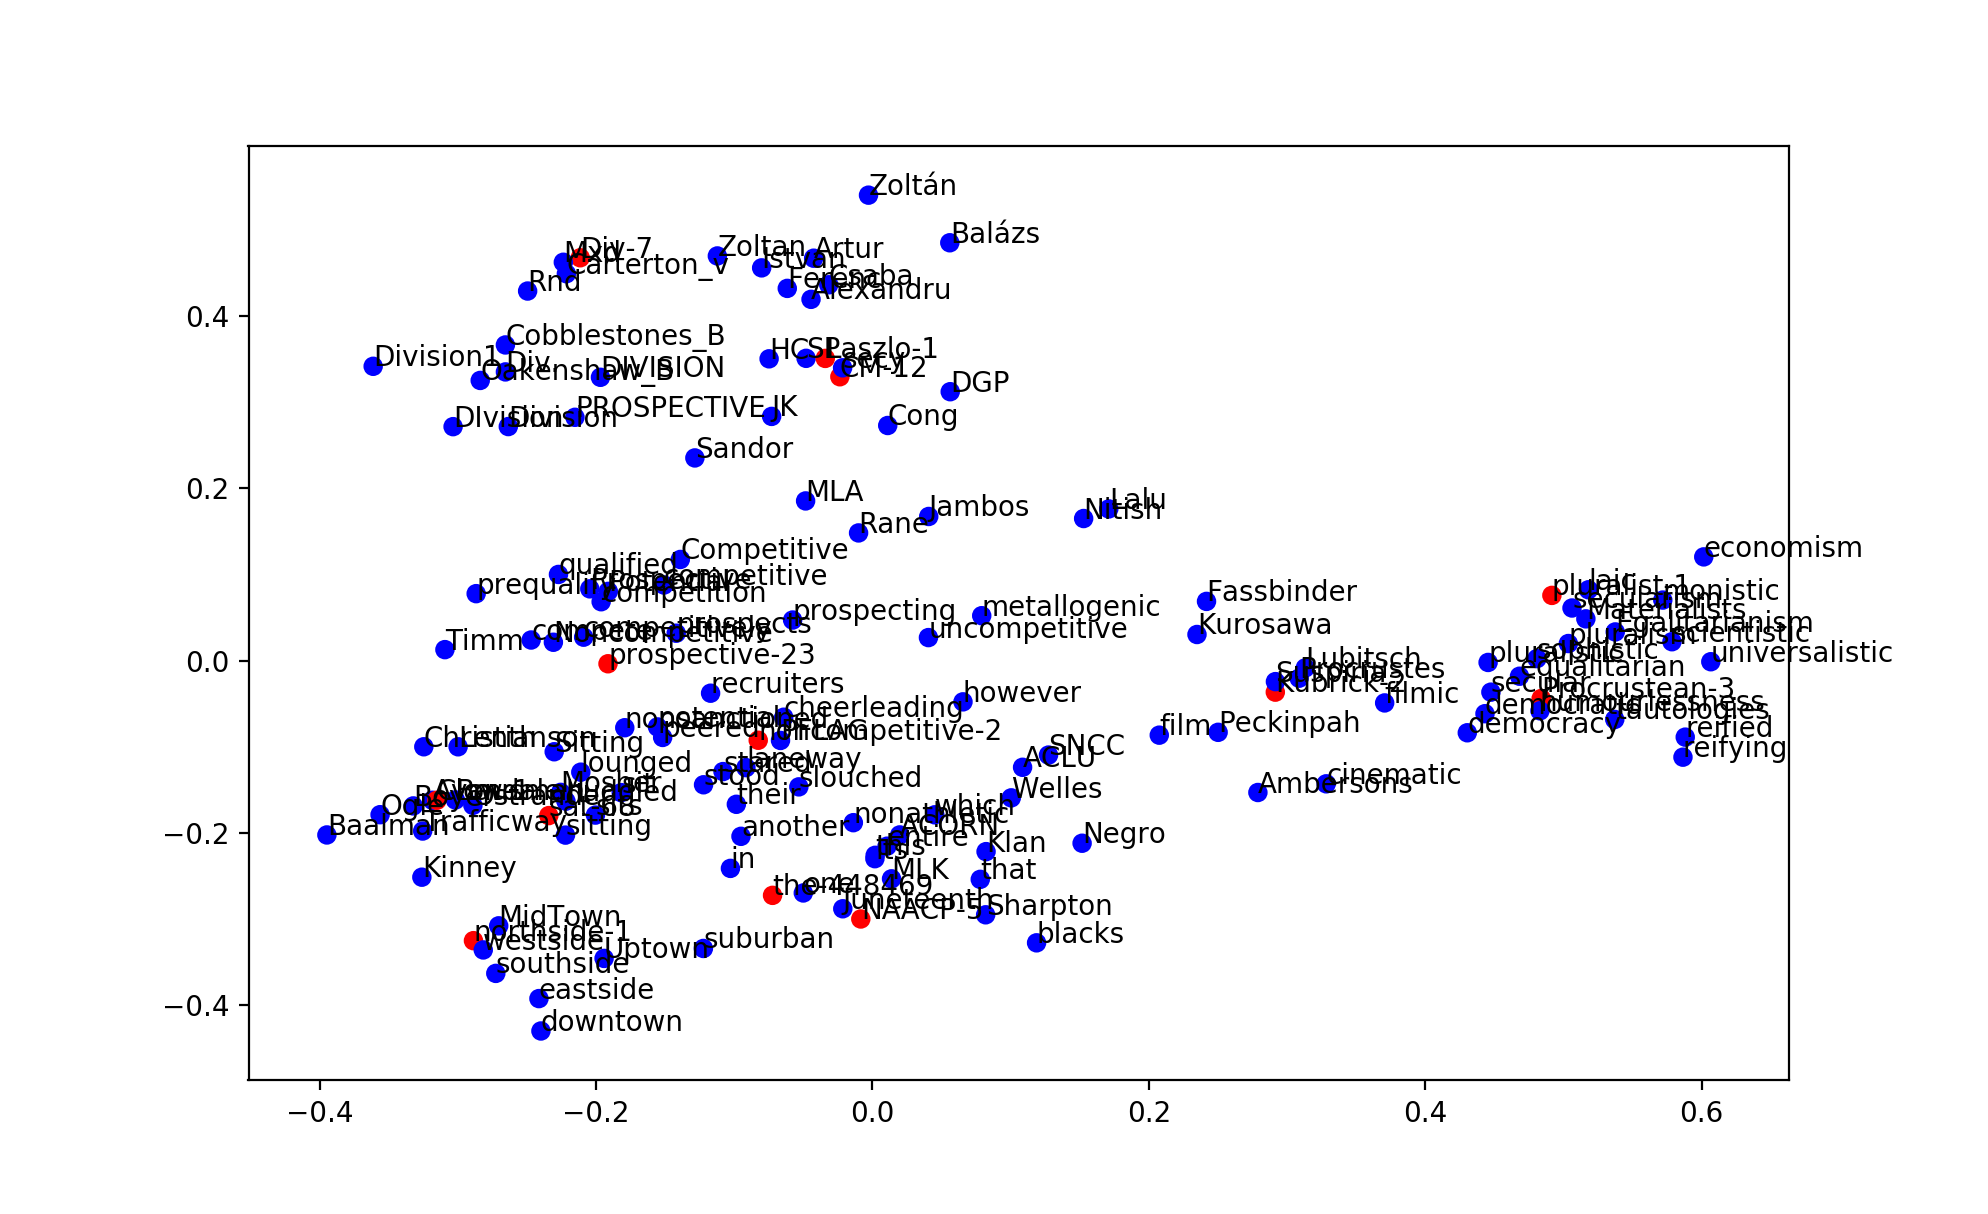

In [40]:
words = sample_words

'''fit a 2d PCA model to the vectors'''
words = [w for w in words if w in w2v]
X = np.array([w2v[w] for w in words])
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1], color=color_words)

for i, word in enumerate(desc_words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [20]:
selected_words = ['bitch', 'asshole', 'motherfucker', 'fuck', 'fucking', 'shit', 'kill', 'bullshit']
sample_words = []
desc_words = []
color_words = []
df = pd.DataFrame()
for w in selected_words:
    ws = [w_ for w_,score in w2v.wv.most_similar(positive=[w])]
    desc_words += [w] + ws
    sample_words += [w] + ws
    color_words += ['r'] + ['b']*len(ws)
    
    df[w] = ws

In [21]:
df

,bitch,asshole,motherfucker,fuck,fucking,shit,kill,bullshit
0,nebracka,142.162.85.154,dawnseeker,slanteye,gaywad,sht,bleac,bullshi
1,fuckiest,pers,meathead,muazim,muther,82.132.244.134,anhero,99.184.231.227
2,dog-eating,bongwarriorcongratualtions,motherfuck,squintey,carrott,shioty,myslf,willyjeeves
3,shup,9-,dolescum,vuvuzelas,fetishist,ashit,bleachanhero,hahahahahahahahahahahahahahahaha
4,86.178.140.114,cuntrag,sucker,yourselfand,dickheaded,gradnman,youcaltlas,cliquey
5,69.50.214.99,fuccin,vegetasaiyan,cunt-gluzing,bawbag,86.134.181.35,pleasee,continues.—
6,142.162.85.92,65.75.190.17,chink==,youpedantic,idiot.149.254.183.53,206.207.175.162,maim,nonsese
7,yaaaa,morhone,fagget,uhhhhhhhhhhhhhhhhhhhh,flithy,12.176.20.2,yourself82.41.107.97,pigshit
8,yaaa,cock-eating,googdbye,poofda,cunthole,shgit,favioe,bible.
9,wheelchairi,consipated,endian,yourselvers,assholes72.191.164.67,14.136.219.161,cookie..,arse94.168.210.205


<IPython.core.display.Javascript object>


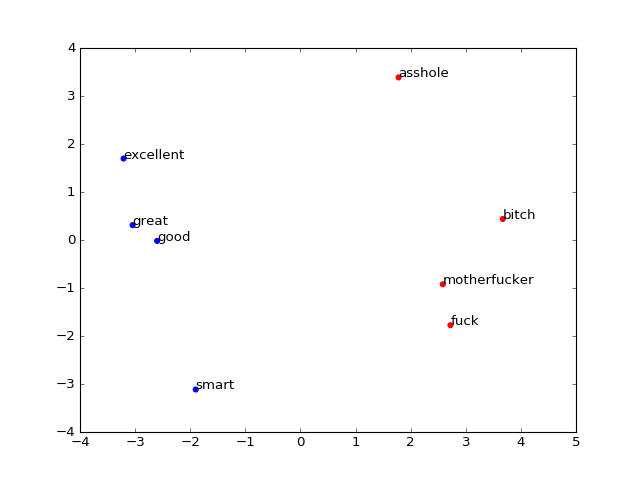

In [19]:
'''fit a 2d PCA model to the vectors'''
selected_words = ['bitch', 'asshole', 'motherfucker', 'fuck',
                  'good', 'excellent', 'great', 'smart']
selected_colors = ['r'] * 4 + ['b'] * 4

words = [w for w in selected_words if w in w2v.wv]
X = np.array([w2v.wv[w] for w in words])
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1], color=selected_colors)

for i, word in enumerate(selected_words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

/u/67/zhangg1/unix/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  after removing the cwd from sys.path.
/u/67/zhangg1/unix/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


<IPython.core.display.Javascript object>


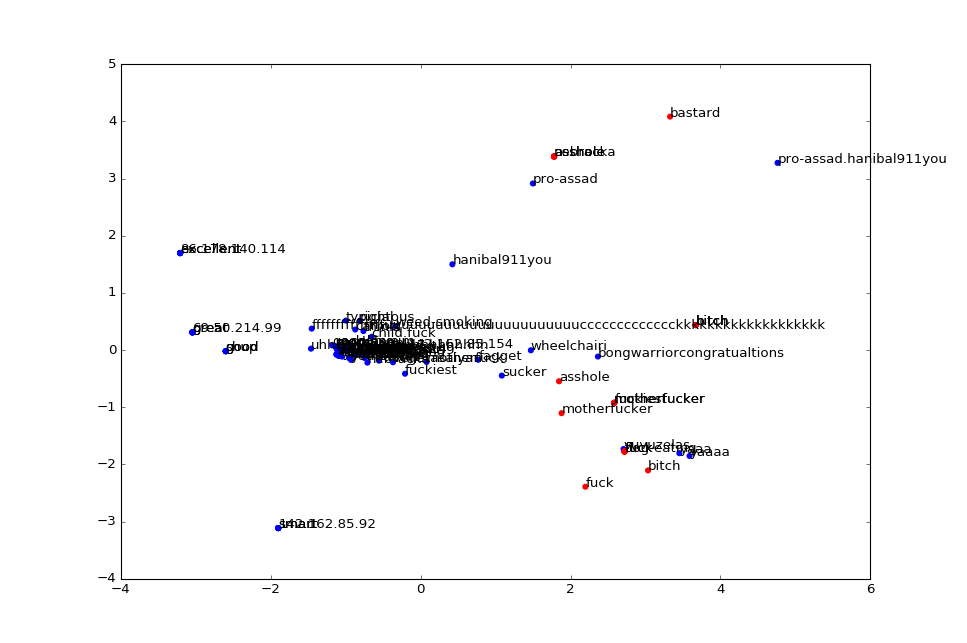

In [7]:
words = sample_words

'''fit a 2d PCA model to the vectors'''
words = [w for w in words if w in w2v]
X = np.array([w2v[w] for w in words])
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1], color=color_words)

for i, word in enumerate(desc_words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()